In [26]:
using DifferentialEquations
using Random
using DataFrames
using Distributions

In [20]:
function continuous_time_SIR(β,γ,N,S0,I0,R0,tf)   
    #Temp Variables for Time, Susceptible Individuals, Infected Individuals, Recovery
    t = 0
    S = S0
    I = I0
    R = R0
    #Array to store SIR and Time
    ta= Float64[]
    Sa= Float64[]
    Ia= Float64[]
    Ra= Float64[]
    
    while t < tf
        push!(ta,t)
        push!(Sa,S)
        push!(Ia,I)
        push!(Ra,R)
        pf1 = β*S*I
        pf2 = γ*I
        pf = pf1+pf2
        dt = rand(Exponential(1/pf))
        t = t+dt
        if t>tf
            break
        end
        ru = rand()
        if ru<(pf1/pf)
            S=S-1
            I=I+1
        else
            I=I-1
            R=R+1
        end
    end
    results = DataFrame()
    results[:time] = ta
    results[:S] = Sa
    results[:I] = Ia
    results[:R] = Ra
    return(results)
end


continuous_time_SIR (generic function with 1 method)

In [21]:
Random.seed!(42);

In [22]:
#continuous_time_SIR(Infected Rate, Recover Rate, Sample Size ,
#Initial Susceptible Individuals, Initial Infected Rate, Initial Recovery Rate, Max Time Increment)
sir_out = continuous_time_SIR(0.1/1000,0.05,1000,999,1,0,200);

In [23]:
head_size = 6
first(sir_out,head_size)

,time,S,I,R
,Float64,Float64,Float64,Float64
1,0.0,999.0,1.0,0.0
2,5.37975,998.0,2.0,0.0
3,5.89318,997.0,3.0,0.0
4,8.47182,997.0,2.0,1.0
5,8.61118,996.0,3.0,1.0
6,16.7678,995.0,4.0,1.0


In [24]:
using StatPlots

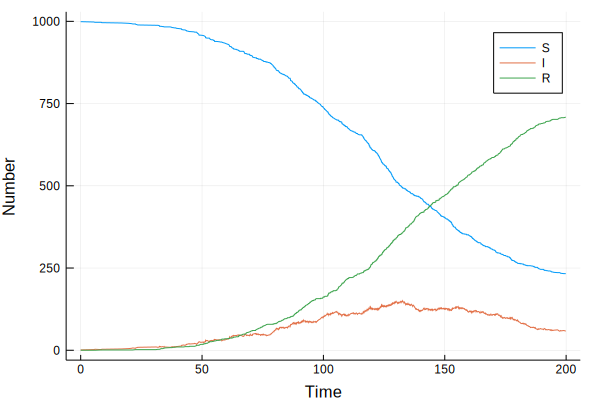

In [25]:
@df sir_out plot(:time, [:S :I :R], xlabel="Time",ylabel="Number")